# Univariate Analysis on Numerical Columns
- Single variable

## Load the data
- Here I load the **pickle file** that was saved in step1

In [70]:
# Do the necessary imports
import pandas as pd

import matplotlib.pyplot as plt

In [71]:
# We load the pickle file so we have the correct data type

# Here I load the **pickle file** that was saved in previous steps
df = pd.read_pickle('data_MPG_clean.pkl')

 # Or start with CSV file
# df = pd.read_csv("data_MPG.csv") # or use this. CSV does not preserve data structures, types

In [72]:
# print 10 sample values

print(df.sample(10))

          mpg  cylinders  displacement  horsepower  weight  acceleration  \
352  29.90625          4            98          65    2380     20.703125   
61   21.00000          4           122          86    2226     16.500000   
363  22.40625          6           231         110    3415     15.796875   
26   10.00000          8           307         200    4376     15.000000   
92   13.00000          8           351         158    4363     13.000000   
287  16.50000          8           351         138    3955     13.203125   
165  20.00000          8           262         110    3221     13.500000   
72   15.00000          8           304         150    3892     12.500000   
123  20.00000          6           156         122    2807     13.500000   
222  17.00000          8           260         110    4060     19.000000   

     model_year origin  
352          81    usa  
61           72    usa  
363          81    usa  
26           70    usa  
92           73    usa  
287          

In [73]:
# lets see data types and memory usage

print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float16 
 1   cylinders     398 non-null    uint8   
 2   displacement  398 non-null    int16   
 3   horsepower    398 non-null    uint8   
 4   weight        398 non-null    int16   
 5   acceleration  398 non-null    float16 
 6   model_year    398 non-null    int8    
 7   origin        398 non-null    category
dtypes: category(1), float16(2), int16(2), int8(1), uint8(2)
memory usage: 5.0 KB
None


## Identify numeric columns

In [74]:
# Lets identify numeric columns

# numeric_cols = df.select_dtypes(include='number').columns.tolist() # based on data type
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'] # manually pick few numeric columns 

print(numeric_cols)

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [75]:
# print few records from numeric columns

print("\nnumeric df:\n",df[numeric_cols].head(5))


numeric df:
     mpg  displacement  horsepower  weight  acceleration
0  18.0           307         130    3504          12.0
1  15.0           350         165    3693          11.5
2  18.0           318         150    3436          11.0
3  16.0           304         150    3433          12.0
4  17.0           302         140    3449          10.5


## Descriptive stats

In [76]:
# Display the descriptive stats
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(df[numeric_cols].describe())

              mpg  displacement  horsepower       weight  acceleration
count  398.000000    398.000000  398.000000   398.000000    398.000000
mean    23.515625    193.424623  104.462312  2970.424623     15.570312
std      7.816406    104.271000   38.199230   846.841774      2.757812
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.500000    104.250000   76.000000  2223.750000     13.822266
50%     23.000000    148.500000   95.000000  2803.500000     15.500000
75%     29.000000    262.000000  125.000000  3608.000000     17.175781
max     46.593750    455.000000  230.000000  5140.000000     24.796875


In [77]:
# lets understand above on mpg: 68% of data lies between:

print(23.5 - 7.8, 23.5 + 7.8)

15.7 31.3


In [78]:
# For mpg, the 25th percentile is Q1=17.5
# This means that 25% of the data has value of mpg < 17.5

In [79]:
# For mpg, the 50th percentile is Q2=23
# This means that 50% of the data has value os mpg < 23

## median

In [80]:
print(df[numeric_cols].median())

mpg               23.0
displacement     148.5
horsepower        95.0
weight          2803.5
acceleration      15.5
dtype: float64


## variance / standard deviation

In [81]:
print(df[numeric_cols].var())
# print(df[numeric_cols].std())

mpg                 61.093750
displacement     10872.441407
horsepower        1459.181196
weight          717140.990526
acceleration         7.605469
dtype: float64


## Mode

In [82]:
cols = ['cylinders', 'model_year']

print(df[cols].mode())

   cylinders  model_year
0          4          73


In [83]:
print(df['cylinders'].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


In [84]:
print(df['model_year'].value_counts())

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


## Histogram

In [85]:
# Optional: Choose palette and font scale

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})

plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

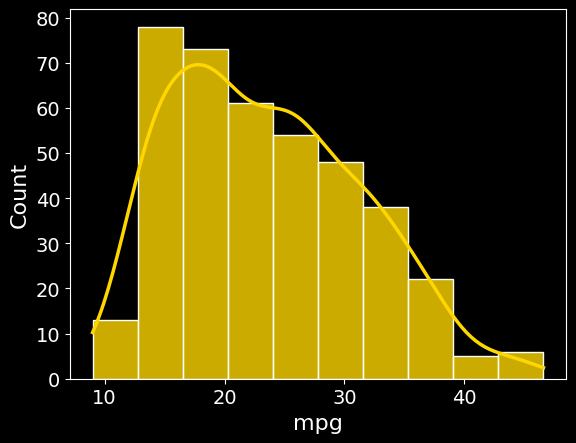

In [86]:
# 1) Plot histogram for 1 column
import seaborn as sns

col = "mpg"

sns.histplot(df[col], bins=10, kde=True, color='gold', edgecolor='white', alpha=0.8) # kde--> Kernel Density Estimation 
plt.show()

# Now lets prettify above

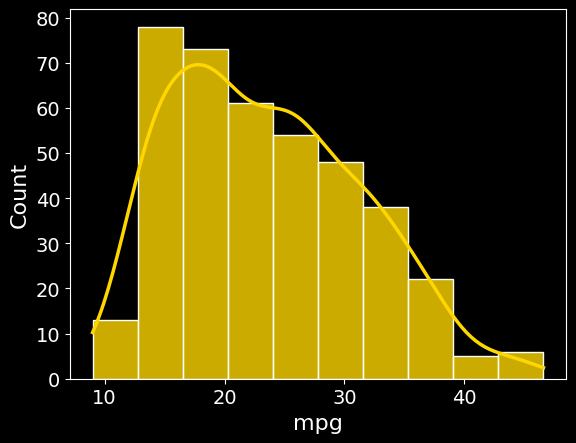

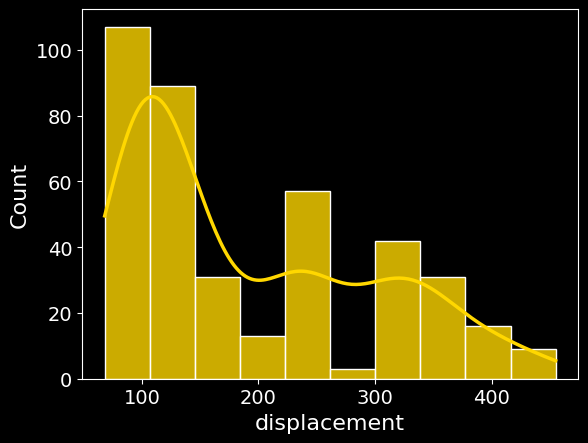

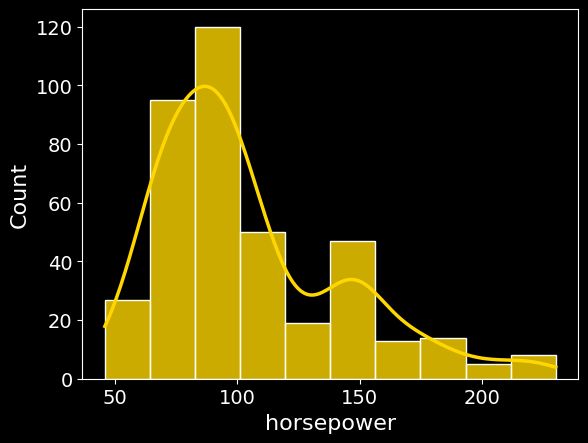

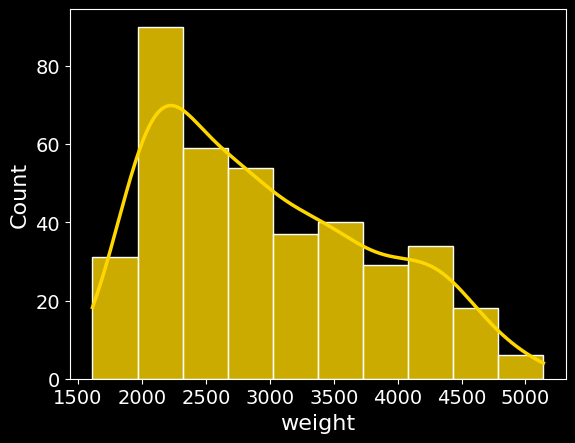

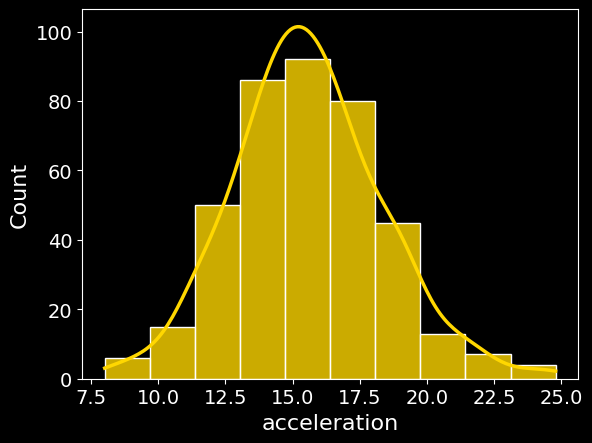

In [87]:
# step2: Now do this for rest of the columns

columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in columns:
    sns.histplot(df[col], bins=10, kde=True, color='gold', edgecolor='white', alpha=0.8) # kde--> Kernel Density Estimation 
    plt.show()

# Observ: 

# KDE

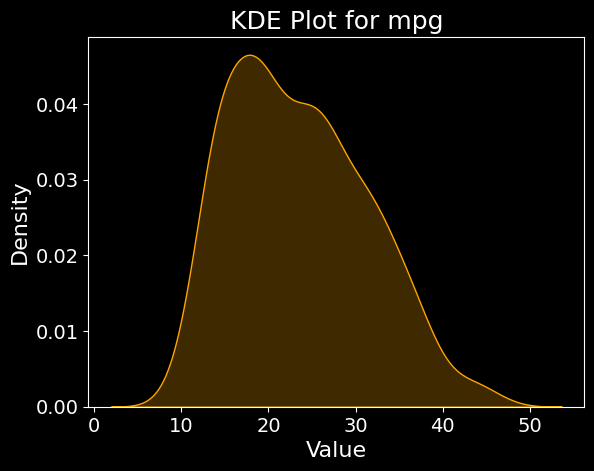

In [88]:
# step1: Now do KDE plot for column Age

col = 'mpg'

sns.kdeplot(data=df, x=col, fill=True, color='orange')

plt.title(f'KDE Plot for {col}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

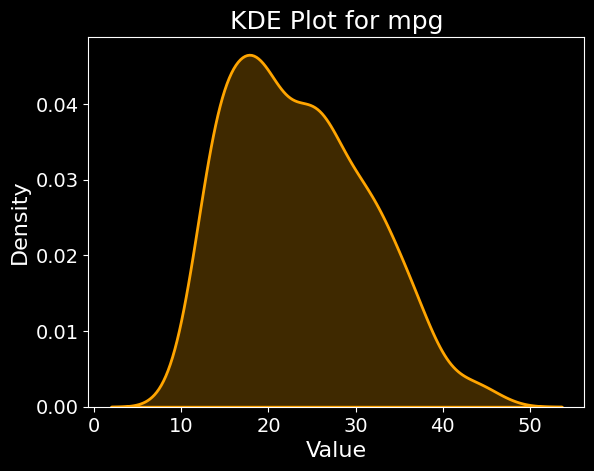

++++++++++++++++++++++



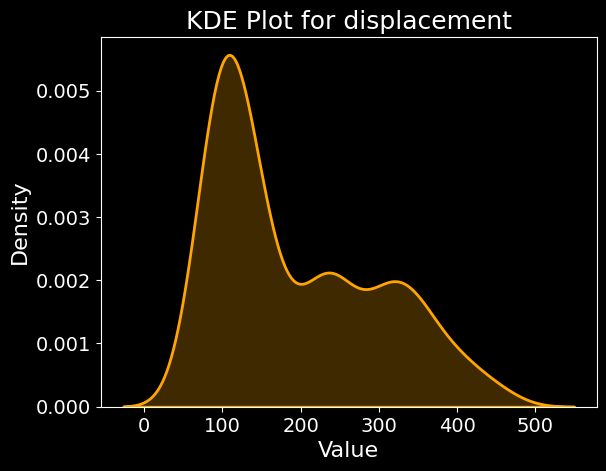

++++++++++++++++++++++



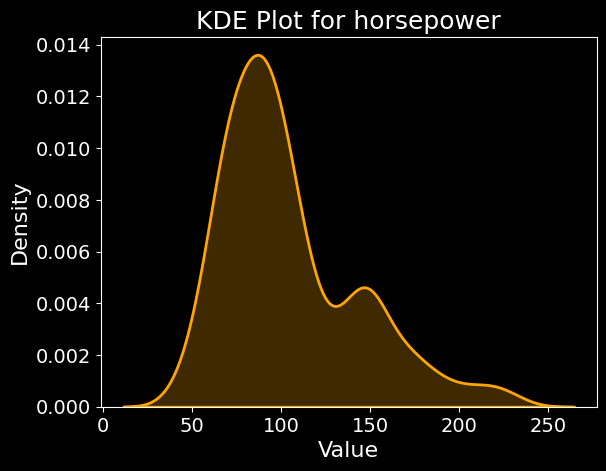

++++++++++++++++++++++



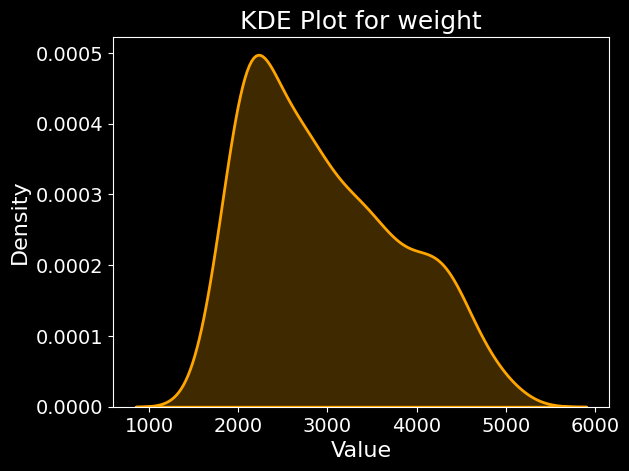

++++++++++++++++++++++



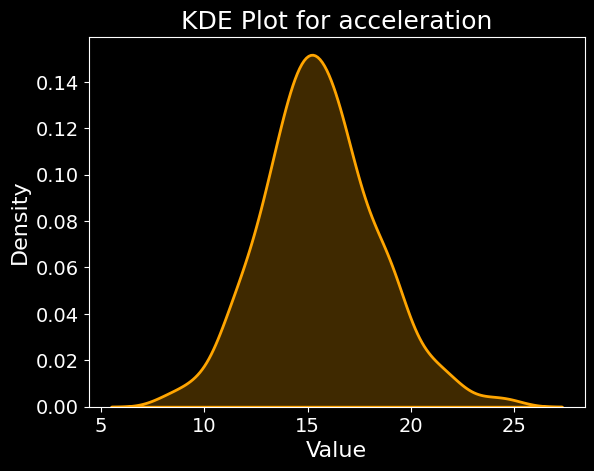

++++++++++++++++++++++



In [89]:
# step2: Now do KDE plot for all numeric columns
# Assuming df is your DataFrame and 'col' is the column of interest

columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in columns:
    sns.kdeplot(data=df, x=col, fill=True, color='orange', linewidth=2)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    print("++++++++++++++++++++++\n")


# Observ: 

## Skewness

In [90]:
# Now I want to know how much my data is varing away form normal distribution: skewness, etc
# Select numeric columns
numeric_cols = ["mpg", "horsepower", "weight", "acceleration", "displacement"]

# Skewness
skewness = df[numeric_cols].skew()
print("Skewness:\n", skewness)

# Skewness:
# ~0 → symmetric
# >0 → right-skewed
# <0 → left-skewed

Skewness:
 mpg             0.456787
horsepower      1.096107
weight          0.531063
acceleration    0.278564
displacement    0.719626
dtype: float64


## Observation:
- acceleration is almost symmetric (AKA Bell-shaped)
- horsepower is right skewed

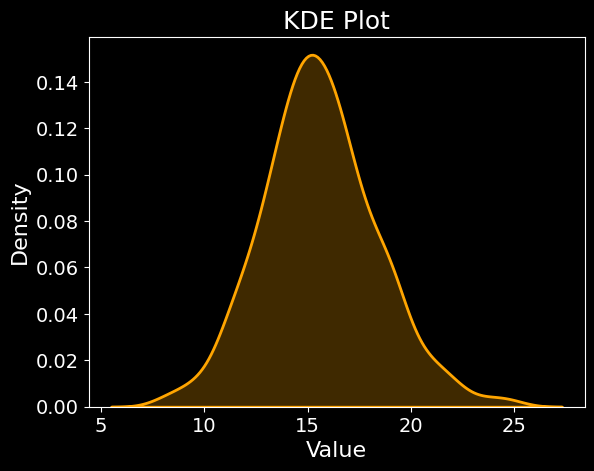

In [91]:
# acceleration is bell shaped: skewness= 0.27 ...close to 0

col = 'acceleration'

sns.kdeplot(data=df, x=col, fill=True, color='orange', linewidth=2)

plt.title('KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

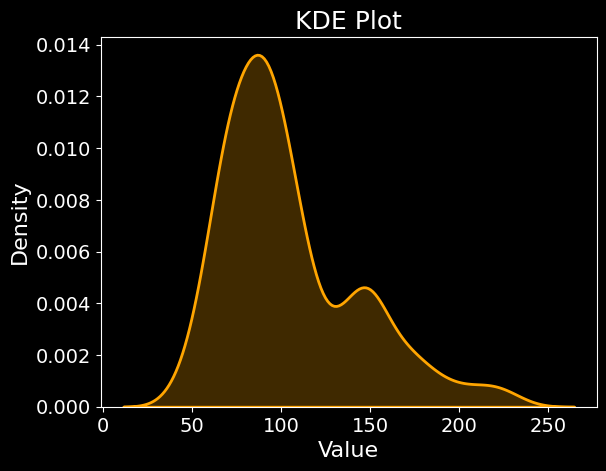

In [92]:
# horsepower is right skewed: skewness= 1.09 ...right skewed

col = 'horsepower'

sns.kdeplot(data=df, x=col, fill=True, color='orange', linewidth=2)

plt.title('KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# STOP

In [93]:
# FIX ME: Kurtosis

kurtosis = df[numeric_cols].kurtosis()
print("\nKurtosis:\n", kurtosis)


# Kurtosis:
# ~0 → normal-like
# 0 → heavy tails (leptokurtic)
# <0 → light tails (platykurtic)


Kurtosis:
 mpg                  NaN
horsepower      0.754312
weight         -0.785529
acceleration         NaN
displacement   -0.746625
dtype: float64


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1353: RuntimeWarning: overflow encountered in square
  adj = 3 * (count - 1) ** 2 / ((count - 2) * (count - 3))
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1353: RuntimeWarning: overflow encountered in multiply
  adj = 3 * (count - 1) ** 2 / ((count - 2) * (count - 3))
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1354: RuntimeWarning: overflow encountered in multiply
  numerator = count * (count + 1) * (count - 1) * m4
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1355: RuntimeWarning: overflow encountered in multiply
  denominator = (count - 2) * (count - 3) * m2**2


In [94]:
# OPTIONAL (NEED TO KNOW WHAT THESE MEANS): Now perform stats
from scipy.stats import shapiro, normaltest, anderson

for col in numeric_cols:
    print(f"\nColumn: {col}")
    
    # Shapiro-Wilk test
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")
    
    # D'Agostino's K-squared test
    stat, p = normaltest(df[col])
    print(f"D'Agostino's K-squared: stat={stat:.3f}, p={p:.3f}")
    
    # Anderson-Darling test
    result = anderson(df[col])
    print(f"Anderson-Darling: stat={result.statistic:.3f}")



Column: mpg
Shapiro-Wilk: stat=0.968, p=0.000
D'Agostino's K-squared: stat=331.952, p=0.000
Anderson-Darling: stat=3.443

Column: horsepower
Shapiro-Wilk: stat=0.905, p=0.000
D'Agostino's K-squared: stat=62.487, p=0.000
Anderson-Darling: stat=12.603

Column: weight
Shapiro-Wilk: stat=0.941, p=0.000
D'Agostino's K-squared: stat=46.086, p=0.000
Anderson-Darling: stat=7.302

Column: acceleration
Shapiro-Wilk: stat=0.992, p=0.040
D'Agostino's K-squared: stat=7.520, p=0.023
Anderson-Darling: stat=0.815

Column: displacement
Shapiro-Wilk: stat=0.880, p=0.000
D'Agostino's K-squared: stat=53.271, p=0.000
Anderson-Darling: stat=17.898


C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1070: RuntimeWarning: overflow encountered in square
  s = s**2
